In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import operator
import random as rand

%matplotlib inline

### Random Number Generator - RANMAR

In [2]:
def ranmarin(ijkl): ### Inicialitzacion para las seeds iniciales

    u=np.zeros(97)
    
    i=(ijkl/177)%177+2; j=ijkl%177+2
    k=(ijkl/169)%178+1; l=ijkl%169
    
    for ii in range(97):
        
        s=0; t=0.5
        
        for jj in range(24):
            
            m=(((i*j)%179)*k)%179
            i=j*1; j=k*1; k=m*1            
            l=(53*l+1)%169 
            
            if ((l*m)%64>=32): ## Generamos el número aleatorio entre [0,1)
                s=s+t
            t=0.5*t
            
        u[ii]=s ### Llenamos el vector de seeds
        
    return u

def ranmar(Len,ijkl): ## RANMAR
    
    u=ranmarin(ijkl) ## Inicializamos el RANMAR con la seed original

    v=np.zeros(Len)
    
    jj=97; kk=33;
    
    d=7654321/16777216; c=16777213/16777216
    c0=6701772/(2**31-1);
    
    for ii in range(Len):
        
        ## Lagged Fibbonacci        
        out = u[jj-1] - u[kk-1] ## Secuencia aditiva con los indices jj y kk
        
        if (out<0): out=out+1 ## Valores entre [0,1)
            
        u[jj-1]=out 
        jj=jj-1
        if(jj<0): jj=97
        kk=kk-1
        if(kk<0): kk=97
            
        ## Arithmetic Sequence
        c0=c0-d
        if(c0<0): c0=c0+c
        out=out-c0
        if(out<0): out=out+1
            
        v[ii]=out
        
    return v

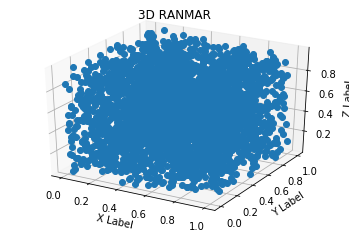

In [3]:
RANMAR=ranmar(10000,241195) ## Ranmar con la fecha November 24, 1995, como seed inicial

x=[]; y=[]; z=[];

for ii in range(3332):

    x.append(RANMAR[3*ii])
    y.append(RANMAR[3*ii+1])
    z.append(RANMAR[3*ii+2])
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z,'o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D RANMAR')
plt.show()

### Lotka-Volterra classic

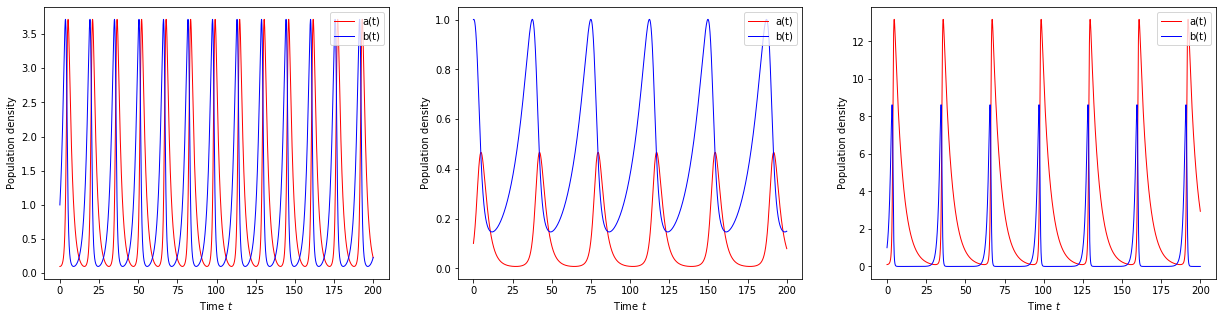

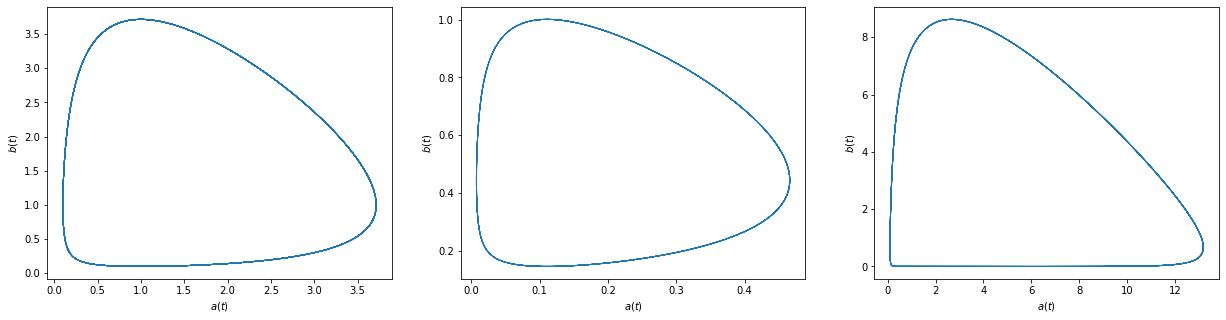

In [4]:
h=0.01; T=200; ST=int(T/h)+1; ## time step, time and number of steps
tvec=np.linspace(0,T,ST); ## time vector

####-Rates-####
lamb=np.array([.5,.9,.3]); ## predator-prey interaction
mu=np.array([.5,.4,.2]); ## prey death 
sigm=np.array([.5,0.1,.8]); ## prey offspring

####-Figures-####
plt.figure(figsize=(21, 5));
plt.figure(1);

plt.figure(figsize=(21, 5));
plt.figure(2);

for jj in range(len(lamb)):
    
    ####-Initial conditions-####
    ao=.1; ## predators population density
    bo=1; ## preys population density

    avec=np.zeros(ST); ## predators trajectory
    bvec=np.zeros(ST); ## preys trajectory
    
    ####-RK4 Integration-####
    for ii in range(ST):
    
        avec[ii]=ao*1; bvec[ii]=bo*1;
    
        k1a = ao*(lamb[jj]*bo-mu[jj])*h; k1b =bo*(sigm[jj]-lamb[jj]*ao)*h;  
        k2a = (ao+k1a/2)*(lamb[jj]*(bo+k1b/2)-mu[jj])*h; k2b =(bo+k1b/2)*(sigm[jj]-lamb[jj]*(ao+k1a/2))*h;
        k3a = (ao+k2a/2)*(lamb[jj]*(bo+k2b/2)-mu[jj])*h; k3b =(bo+k2b/2)*(sigm[jj]-lamb[jj]*(ao+k2a/2))*h;
        k4a = (ao+k3a)*(lamb[jj]*(bo+k3b)-mu[jj])*h; k4b =(bo+k3b)*(sigm[jj]-lamb[jj]*(ao+k3a))*h;
    
        ao= ao + (k1a+2*(k2a+k3a)+k4a)/6;
        bo= bo + (k1b+2*(k2b+k3b)+k4b)/6;
    
    ####-Figures-####
    plt.figure(1);
    plt.subplot(1,3,jj+1)
    plt.plot(tvec,avec,'r',linewidth=1,label='a(t)');
    plt.plot(tvec,bvec,'b',linewidth=1,label='b(t)');
    plt.xlabel('Time $t$');
    plt.ylabel('Population density');
    plt.legend(loc='upper right');

    plt.figure(2)
    plt.subplot(1,3,jj+1)
    plt.plot(avec,bvec,linewidth=1);
    plt.xlabel('$a(t)$');
    plt.ylabel('$b(t)$');

### Lotka-Volterra contact process 

In [36]:
###### INITIAL CONDITIONS FOR LARGE MATRIX ######
### ONE PARTICLE RESTRICTION ###
n=50; n=n+2; ## square matrix + boundary conditions

Wd=0.5; ## Initial predators density  
Rd=0.5; ## Initial preys density      

Wm=np.random.rand(n,n); ## Predators matrix
Wm=np.int_(Wm+Wd);
Wm[0,:]=np.zeros((1,n))*1;##BC
Wm[n-1,:]=np.zeros((1,n))*1;##BC
Wm[:,n-1]=np.zeros((1,n))*1;##BC
Wm[:,0]=np.zeros((1,n))*1;##BC

Rm=np.random.rand(n,n); ## Predators matrix
Rm=np.int_(Rm+Rd);
Rm[0,:]=np.zeros((1,n))*1;##BC
Rm[n-1,:]=np.zeros((1,n))*1;##BC
Rm[:,n-1]=np.zeros((1,n))*1;##BC
Rm[:,0]=np.zeros((1,n))*1;##BC

for ii in range(n-2):
    for jj in range(n-2):
        if (Rm[ii+1,jj+1] == 1) and (Wm[ii+1,jj+1] == 1):
            if np.random.rand() >= .5:
                Rm[ii+1,jj+1]=int(0);
            else:
                Wm[ii+1,jj+1]=int(0);

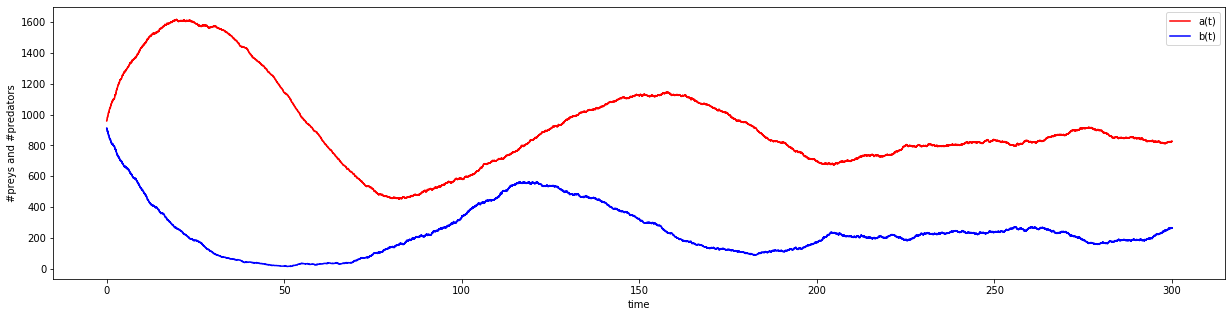

In [37]:
#####-DYNAMICS-#####
Mst=300;
st=Mst*((n-2)**2); ##number of steps or iterations
tvec=np.array([0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,0])*((n-2)**2); tk=0;

####-Figures-####
plt.figure(figsize=(21, 5));
plt.figure(1);

##Dynamic probabilities
D=1; ##movement
mu=0.05; ##predator death
sigm=0.6; ##prey ofspring
lamb=1; ##prob of hunt the prey + ofspring

Wvec=[]; ##predator evolution
Rvec=[]; ##prey evolution

for ii in range(st):  ##Select a random guy
    
    r1=np.random.rand(n,n); r1=r1*Wm; 
    ## r1=ranmat(n,n); r1=r1*Wm #### RANMAR 
    k1=np.unravel_index(r1.argmax(), r1.shape);

    r2=np.random.rand(n,n); r2=r2*Rm; 
    ## r2=ranmat(n,n); r2=r2*Rm #### RANMAR
    k2=np.unravel_index(r2.argmax(), r2.shape);

    kvec=np.array([r1[k1[0],k1[1]],r2[k2[0],k2[1]]]);
    kvec=np.unravel_index(kvec.argmax(), kvec.shape);
    
    """Plots to save
    if ii==tvec[tk]:
        tk=tk+1;
        plt.figure();
        plt.imshow(Wm*2+Rm);
        plt.title('t='+str(tvec[tk-1]/(n-2)**2));

        cbar = plt.colorbar(ticks=[0, 1, 2]);
        cbar.ax.set_yticklabels(['Empty', 'Prey', 'Predator']);
        plt.show();
    """
    

    Wm[0,:]=Wm[n-2,:]*1; Rm[0,:]=Rm[n-2,:]*1; ##Periodic boundary conditions
    Wm[n-1,:]=Wm[1,:]*1; Rm[n-1,:]=Rm[1,:]*1; ##Periodic boundary conditions
    Wm[:,0]=Wm[:,n-2]*1; Rm[:,0]=Rm[:,n-2]*1; ##Periodic boundary conditions
    Wm[:,n-1]=Wm[:,1]*1; Rm[:,n-1]=Rm[:,1]*1; ##Periodic boundary conditions
    
        
    if kvec[0]==0: 
        ind=np.array([k1[0],k1[1]]); ##guy choosed is a predator
        
        r=np.random.rand(); ##Choose the dynamics randomly
        ## r=ranmar(1,np.random.rand(1)*1e5);
        
        if r < .25: ##move the ocupant with probability D
            rm=np.random.rand(); rd=np.random.rand();
            ## rm=ranmar(1,np.random.rand(1)*1e5); rd=ranmar(1,np.random.rand(1)*1e5);
            
            if rd <= D:
            
                if (rm < .25) and (Wm[ind[0]+1,ind[1]]==0) and (Rm[ind[0]+1,ind[1]]==0):
                    Wm[ind[0],ind[1]]=0;
                    Wm[ind[0]+1,ind[1]]=1;
                    
                    if (ind[0]+1) == n-1: ##BC
                        Wm[1,:]=Wm[n-1,:]*1;                                         
                    
                elif (.25 <= rm < .5) and (Wm[ind[0]-1,ind[1]]==0) and (Rm[ind[0]-1,ind[1]]==0):
                    Wm[ind[0],ind[1]]=0;
                    Wm[ind[0]-1,ind[1]]=1;
                    
                    if (ind[0]-1) == 0: ##BC
                        Wm[n-2,:]=Wm[0,:]*1;
                                        
                elif (.5 <= rm < .75) and (Wm[ind[0],ind[1]+1]==0) and (Rm[ind[0],ind[1]+1]==0):
                    Wm[ind[0],ind[1]]=0;
                    Wm[ind[0],ind[1]+1]=1;
                    
                    if (ind[1]+1) == n-1: ##BC
                        Wm[:,1]=Wm[:,n-1]*1;                    
                    
                elif (.75 <= rm < 1) and (Wm[ind[0],ind[1]-1]==0) and (Rm[ind[0],ind[1]-1]==0):
                    Wm[ind[0],ind[1]]=0;
                    Wm[ind[0],ind[1]-1]=1;
                    
                    if (ind[1]-1) == 0: ##BC
                        Wm[:,n-2]=Wm[:,0]*1;
                    
                    
        elif .25 <= r < .5: ##if predator, die with prob mu
            rm=np.random.rand();
            ## rm=ranmar(1,np.random.rand(1)*1e5);
            
            if rm <= mu:
                Wm[ind[0],ind[1]]=0;
                
        elif .5 <= r < .75: ##if predator, caught the prey with prob lambda + ofspring
            
            rm=np.random.rand(); rl=np.random.rand();
            ## rm=ranmar(1,np.random.rand(1)*1e5); rl=ranmar(1,np.random.rand(1)*1e5);
            
            if rl <= lamb:
            
                if (rm < .25) and (Rm[ind[0]+1,ind[1]]==1):
                    Wm[ind[0]+1,ind[1]]=1;
                    Rm[ind[0]+1,ind[1]]=0;
                    
                    if (ind[0]+1) == n-1: ##BC
                        Rm[1,:]=Rm[n-1,:]*1
                        Wm[1,:]=Wm[n-1,:]*1;
                                        
                elif (.25 <= rm < .5) and (Rm[ind[0]-1,ind[1]]==1):
                    Wm[ind[0]-1,ind[1]]=1;
                    Rm[ind[0]-1,ind[1]]=0;
                    
                    if (ind[0]-1) == 0: ##BC
                        Rm[n-2,:]=Rm[0,:]*1;
                        Wm[n-2,:]=Wm[0,:]*1;
                    
                elif (.5 <= rm < .75) and (Rm[ind[0],ind[1]+1]==1):
                    Wm[ind[0],ind[1]+1]=1;
                    Rm[ind[0],ind[1]+1]=0;
                    
                    if (ind[1]+1) == n-1: ##BC
                        Rm[:,1]=Rm[:,n-1]*1;
                        Wm[:,1]=Wm[:,n-1]*1;
                    
                elif (.75 <= rm < 1) and (Rm[ind[0],ind[1]-1]==1):
                    Wm[ind[0],ind[1]-1]=1;
                    Wm[ind[0],ind[1]-1]=0;
                    
                    if (ind[1]-1) == 0: ##BC
                        Rm[:,n-2]=Rm[:,0]*1;
                        Wm[:,n-2]=Wm[:,0]*1;
                                    
          
    else: 
        ind=np.array([k2[0],k2[1]]); ##guy choosed is a prey
        
        r=np.random.rand(); ##Choose the dynamics randomly
        ## r=ranmar(1,np.random.rand(1)*1e5);
        
        if r<.25: ##move the ocupant with probability D
            rm=np.random.rand(); rd=np.random.rand();
            ## rm=ranmar(1,np.random.rand(1)*1e5); rd=ranmar(1,np.random.rand(1)*1e5);
            
            if rd <= D:
            
                if (rm < .25) and (Wm[ind[0]+1,ind[1]]==0) and (Rm[ind[0]+1,ind[1]]==0):
                    Rm[ind[0],ind[1]]=0;
                    Rm[ind[0]+1,ind[1]]=1;
                    
                    if (ind[0]+1) == n-1: ##BC
                        Rm[1,:]=Rm[n-1,:]*1;
                    
                elif (.25 <= rm < .5) and (Wm[ind[0]-1,ind[1]]==0) and (Rm[ind[0]-1,ind[1]]==0):
                    Rm[ind[0],ind[1]]=0
                    Rm[ind[0]-1,ind[1]]=1
                    
                    if (ind[0]-1) == 0: ##BC
                        Rm[n-2,:]=Rm[0,:]*1;
                    
                elif (.5 <= rm < .75) and (Wm[ind[0],ind[1]+1]==0) and (Rm[ind[0],ind[1]+1]==0):
                    Rm[ind[0],ind[1]]=0
                    Rm[ind[0],ind[1]+1]=1
                    
                    if (ind[1]+1) == n-1: ##BC
                        Rm[:,1]=Rm[:,n-1]*1;
                                        
                elif (.75 <= rm < 1) and (Wm[ind[0],ind[1]-1]==0) and (Rm[ind[0],ind[1]-1]==0):
                    Rm[ind[0],ind[1]]=0
                    Rm[ind[0],ind[1]-1]=1
                    
                    if (ind[1]-1) == 0: ##BC
                        Rm[:,n-2]=Rm[:,0]*1;

        
        if .75 <= r < 1: ##if prey, offspring with prob sigma
            
            rm=np.random.rand(); rs=np.random.rand();
            ## rm=ranmar(1,np.random.rand(1)*1e5);
            
            if rs <= sigm:
            
                if (rm < .25) and (Rm[ind[0]+1,ind[1]]==0) and (Wm[ind[0]+1,ind[1]]==0):
                    Rm[ind[0]+1,ind[1]]=1;
                    
                    if (ind[0]+1) == n-1: ##BC
                        Rm[1,:]=Rm[n-1,:]*1;
                    
                elif (.25 <= rm < .5) and (Rm[ind[0]-1,ind[1]]==0) and (Wm[ind[0]-1,ind[1]]==0):
                    Rm[ind[0]-1,ind[1]]=1;
                    
                    if (ind[0]-1) == 0: ##BC
                        Rm[n-2,:]=Rm[0,:]*1;
                    
                elif (.5 <= rm < .75) and (Rm[ind[0],ind[1]+1]==0) and (Wm[ind[0],ind[1]+1]==0):
                    Rm[ind[0],ind[1]+1]=1;
                    
                    if (ind[1]+1) == n-1: ##BC
                        Rm[:,1]=Rm[:,n-1]*1;
                    
                elif (.75 <= rm < 1) and (Rm[ind[0],ind[1]-1]==0) and (Wm[ind[0],ind[1]-1]==0):
                    Rm[ind[0],ind[1]-1]=1;
                    
                    if (ind[1]-1) == 0: ##BC
                        Rm[:,n-2]=Rm[:,0]*1;
   
    
    Wm[0,:]=np.zeros((1,n))*1;##BC
    Rm[0,:]=np.zeros((1,n))*1;##BC
    
    Wm[n-1,:]=np.zeros((1,n))*1;##BC
    Rm[n-1,:]=np.zeros((1,n))*1;##BC
    
    Wm[:,n-1]=np.zeros((1,n))*1;##BC
    Rm[:,n-1]=np.zeros((1,n))*1;##BC
    
    Wm[:,0]=np.zeros((1,n))*1;##BC
    Rm[:,0]=np.zeros((1,n))*1;##BC   
    
    Wvec.append(sum(sum(Wm)));
    Rvec.append(sum(sum(Rm)));

Wm=Wm[1:n-2,1:n-2]*1;
Rm=Rm[1:n-2,1:n-2]*1;

"""
plt.figure();
plt.imshow(Wm*2+Rm);
plt.title('t=1000');
cbar = plt.colorbar(ticks=[0, 1, 2]);
cbar.ax.set_yticklabels(['Empty', 'Prey', 'Predator']);
plt.show();
"""

plt.figure(1);
plt.plot(np.linspace(1,st,st)/((n-2)**2),Wvec,'r',label='a(t)');
plt.plot(np.linspace(1,st,st)/((n-2)**2),Rvec,'b',label='b(t)');
plt.legend(loc='upper right');
plt.xlabel('time');
plt.ylabel('#preys and #predators');